In [ ]:
!pip install kaggle

In [ ]:
!pip install pandas

In [ ]:
# #LOCAL CODE FOR TRAINING
# conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0
# # Anything above 2.10 is not supported on the GPU on Windows Native
# python -m pip install "tensorflow<2.11"
# # Verify the installation:
# python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

In [ ]:
#uploading my kaggle account api token
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#moving the kaggle api token to another directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#our base 3 datasets
!kaggle datasets download -d "mazlumi/mbti-personality-type-twitter-dataset"
!kaggle datasets download -d "zeyadkhalid/mbti-personality-types-500-dataset"
!kaggle datasets download -d "datasnaek/mbti-type"
# !kaggle datasets download -d leadbest/googlenewsvectorsnegative300

 83% 27.0M/32.7M [00:00<00:00, 67.1MB/s]
100% 32.7M/32.7M [00:00<00:00, 67.9MB/s]
 94% 116M/123M [00:01<00:00, 94.7MB/s]
100% 123M/123M [00:01<00:00, 86.4MB/s]
 94% 23.0M/24.4M [00:00<00:00, 83.8MB/s]
100% 24.4M/24.4M [00:00<00:00, 75.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('mbti-personality-type-twitter-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

zip_ref = zipfile.ZipFile('mbti-personality-types-500-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

zip_ref = zipfile.ZipFile('mbti-type.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()
# zip_ref = zipfile.ZipFile('/content/googlenewsvectorsnegative300.zip', 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

In [ ]:
ls

 GoogleNews-vectors-negative300.bin      mbti-personality-types-500-dataset.zip
 GoogleNews-vectors-negative300.bin.gz   mbti-personality-type-twitter-dataset.zip
 googlenewsvectorsnegative300.zip        mbti-type.zip
 mbti_1.csv                              sample_data/
'MBTI 500.csv'                           twitter_MBTI.csv


In [ ]:
import pandas as pd

In [ ]:
#loading from colab
# Assuming the CSV files are named file1.csv, file2.csv, and file3.csv
file1_path = '/content/twitter_MBTI.csv'
file2_path = '/content/mbti_1.csv'
file3_path = '/content/MBTI 500.csv'

# Read the CSV files into pandas dataframes
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)
df3 = pd.read_csv(file3_path)

# Now, you can use df1, df2, and df3 as your dataframes
# For example, you can print the first few rows of each dataframe
print("DataFrame 1:")
print(df1.head())

print("\nDataFrame 2:")
print(df2.head())

print("\nDataFrame 3:")
print(df3.head())

DataFrame 1:
   Unnamed: 0                                               text label
0           0  @Pericles216 @HierBeforeTheAC @Sachinettiyil T...  intj
1           1  @Hispanthicckk Being you makes you look cute||...  intj
2           2  @Alshymi Les balles sont réelles et sont tirée...  intj
3           3  I'm like entp but idiotic|||Hey boy, do you wa...  intj
4           4  @kaeshurr1 Give it to @ZargarShanif ... He has...  intj

DataFrame 2:
   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

DataFrame 3:
                                               posts  type
0  know intj tool use interaction people excuse a...  INTJ
1  rap music ehh opp yeah know valid well know fa...  INTJ
2 

In [ ]:
#loading from LOCAL
# # Assuming the CSV files are named file1.csv, file2.csv, and file3.csv
# file1_path = './twitter_MBTI.csv'
# file2_path = './mbti_1.csv'
# file3_path = './MBTI 500.csv'

# # Read the CSV files into pandas dataframes
# df1 = pd.read_csv(file1_path)
# df2 = pd.read_csv(file2_path)
# df3 = pd.read_csv(file3_path)

# # Now, you can use df1, df2, and df3 as your dataframes
# # For example, you can print the first few rows of each dataframe
# print("DataFrame 1:")
# print(df1.head())

# print("\nDataFrame 2:")
# print(df2.head())

# print("\nDataFrame 3:")
# print(df3.head())

In [ ]:
# Array of DataFrame columns
array_of_texts = [df1['text'], df2['posts'], df3['posts']]  # Add more columns as needed
array_of_labels = [df1['label'], df2['type'], df3['type']]
# Create a new DataFrame and append the columns
texts_df = pd.concat(array_of_texts, axis=0)
labels_df = pd.concat(array_of_labels, axis=0)

df = pd.concat([texts_df, labels_df], axis=1)

In [ ]:
print(len(df1))
print(len(df2))
print(len(df3))
print(len(df2)+ len(df3)+ len(df1), " = ", len(df))

7811
8675
106067
122553  =  122553


In [ ]:
new_column_names = {0: 'Post', 1: 'Label'}
df.rename(columns=new_column_names, inplace=True)

In [ ]:
df

,Post,Label
0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj
1,@Hispanthicckk Being you makes you look cute||...,intj
2,@Alshymi Les balles sont réelles et sont tirée...,intj
3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj
4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


#Pre-Processing the data removing outliers

In [ ]:
#removing duplicates from the merge
df = df.drop_duplicates()

In [ ]:
# Remove strings starting with "@" and "@/"
df['Post'] = df['Post'].str.replace(r'@\w+', '', regex=True)
df['Post'] = df['Post'].str.replace(r'@/\w+', '', regex=True)

<ipython-input-12-7b189e2febc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Post'] = df['Post'].str.replace(r'@\w+', '', regex=True)
<ipython-input-12-7b189e2febc6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Post'] = df['Post'].str.replace(r'@/\w+', '', regex=True)


In [ ]:
# Removing all links in our posts
df['Post'] = df['Post'].str.replace(r'\bhttp\S*\b', '', regex=True)

<ipython-input-13-774f03e025ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Post'] = df['Post'].str.replace(r'\bhttp\S*\b', '', regex=True)


In [ ]:
# Remove "|||" from the "Post" column
df['Post'] = df['Post'].str.replace(r'\|\|\|', '\n', regex=True)

<ipython-input-14-3dfb371182f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Post'] = df['Post'].str.replace(r'\|\|\|', '\n', regex=True)


In [ ]:
# removing A4$\n and &gt; and &lt;3
df['Post'] = df['Post'].str.replace(r'A4$\n', '', regex=True)
df['Post'] = df['Post'].str.replace(r'&gt;', '', regex=True)
df['Post'] = df['Post'].str.replace(r'&lt;3', '', regex=True)

<ipython-input-15-8387e8a64adf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Post'] = df['Post'].str.replace(r'A4$\n', '', regex=True)
<ipython-input-15-8387e8a64adf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Post'] = df['Post'].str.replace(r'&gt;', '', regex=True)
<ipython-input-15-8387e8a64adf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [ ]:
# removing "…" which caused by scraping error and not the post it self other than ...
df['Post'] = df['Post'].str.replace(r'…', '', regex=True)

<ipython-input-16-c91fb016acb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Post'] = df['Post'].str.replace(r'…', '', regex=True)


In [ ]:
# Remove words starting and ending with ":" || some emojiees fails to load and get loaded by text.
df['Post'] = df['Post'].str.replace(r':\w+:', '', regex=True)

<ipython-input-17-9e8ec851f619>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Post'] = df['Post'].str.replace(r':\w+:', '', regex=True)


In [ ]:
# Convert values in the "c" column to uppercase
df['Label'] = df['Label'].str.upper()

<ipython-input-18-3a9f658b76e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = df['Label'].str.upper()


In [ ]:
i = 15

In [ ]:
# Print the first element in the "Post" column
i+=1
print(df['Post'].iloc[i])

 No. For Byul was "no!"
Ok!
Here I am. My Frankfurt experience.
This is nothing more than a poor video made on a cell phone.
But as I looke 
 21 feb docet
 Come darle torto.
 Non gliene frega na ceppa proprio
Yong verso la fine della live stava per piangere mi sa ....
Si... È vero.  perché gli americani sono per la maggior parte obesi 
   ancora di più  even Hwasa had said 1 anyway ....

But I think you haven't noticed either 🤣🤣🤣🤣  speaks truth  today my bias Is Hwasa 🤣🤣🤣🤣 
 L inizio è capibile, quando Byul legge le lettere, la prima parla di fidanzati/e 🤣
Queste Magnano sempre ❤️  le 2 e 3 gen , i leader, sorpassano tutti i 30 anni... E sono giovani... Non vedo tutta sta fretta di invecch  è spiccia 🤣 
 Right Arm : This is my soul and music saved my life from depression. 
 It makes sense because its not possible to go from blonde to brunette without an intermediate step with 
 Fermarsi significa anche questo. Essere felici per loro e la loro vita privata. 😭😭😭🥹🥹🥹🥹🥹
 Perché altrimenti n

###------------------------------------------------------------------------------
##     Preparing all dataframes
###----------------------------------------------------------------------------------

In [ ]:
#Major dataset containg all MBTI categories
df

,Post,Label
0,"The Pope is infallible, this is a catholic ...",INTJ
1,"Being you makes you look cute\n On, because t...",INTJ
2,Les balles sont réelles et sont tirées très r...,INTJ
3,"I'm like entp but idiotic\nHey boy, do you wan...",INTJ
4,Give it to ... He has Pica since childhood\n...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


In [ ]:
#Introver Extrovert Dataframe
ie_df = df.copy()

#Sensors Intuitves Dataframe
ns_df = df.copy()

#Thinkers Feelers Dataframe
tf_df = df.copy()

#Judgers Preservers Dataframe
jp_df = df.copy()

# Modify the "Label" column for each one of the above
ie_df['Label'] = ie_df['Label'].str[:-3]

ns_df['Label'] = ns_df['Label'].str[1:-2]

tf_df['Label'] = tf_df['Label'].str[2:-1]

jp_df['Label'] = jp_df['Label'].str[3:]

In [ ]:
print(ie_df)
print(ns_df)
print(tf_df)
print(jp_df)

                                                     Post Label
0          The Pope is infallible, this is a catholic ...     I
1        Being you makes you look cute\n On, because t...     I
2        Les balles sont réelles et sont tirées très r...     I
3       I'm like entp but idiotic\nHey boy, do you wan...     I
4        Give it to  ... He has Pica since childhood\n...     I
...                                                   ...   ...
106062  stay frustrate world life want take long nap w...     I
106063  fizzle around time mention sure mistake thing ...     I
106064  schedule modify hey w intp strong wing underst...     I
106065  enfj since january busy schedule able spend li...     I
106066  feel like men good problem tell parent want te...     I

[122324 rows x 2 columns]
                                                     Post Label
0          The Pope is infallible, this is a catholic ...     N
1        Being you makes you look cute\n On, because t...     N
2        Les 

In [ ]:
# Print all rows where the "Label" column has a value containing the letter "E"
print("I, E sizes", len(ie_df[ie_df['Label'].str.contains('I')]), len(ie_df[ie_df['Label'].str.contains('E')]))
print("N, S sizes", len(ns_df[ns_df['Label'].str.contains('N')]), len(ns_df[ns_df['Label'].str.contains('S')]))
print("T, F sizes", len(tf_df[tf_df['Label'].str.contains('T')]), len(tf_df[tf_df['Label'].str.contains('F')]))
print("J, P sizes", len(jp_df[jp_df['Label'].str.contains('J')]), len(jp_df[jp_df['Label'].str.contains('P')]))

I, E sizes 92438 29886
N, S sizes 110190 12134
T, F sizes 76297 46027
J, P sizes 51200 71124


In [ ]:
import numpy as np

In [ ]:
#equazling the dataframes values
def equalizer(df):
  # Display the unique values of the "Label" column and their counts
  label_counts = df['Label'].value_counts()

  #getting the minority and majority
  minority = label_counts[label_counts == label_counts.min()]
  majority = label_counts[label_counts == label_counts.max()]

  # Number of values to drop
  values_to_drop = majority.values[0] - minority.values[0]

  print("Dropping :", values_to_drop, " Given that we have mj,mn : ", majority.values[0], minority.values[0])
  # Identify indices where Label is "I"
  indices_i = df[df['Label'] == majority.index[0]].index

  # Randomly select indices to drop, ensuring not to exceed the current count of "I"
  indices_to_drop = np.random.choice(indices_i, size=values_to_drop, replace=False)

  df = df.drop(indices_to_drop)

  return df

In [ ]:
qualized_ie_df = equalizer(ie_df)
qualized_ns_df = equalizer(ns_df)
qualized_tf_df = equalizer(tf_df)
qualized_jp_df = equalizer(jp_df)

Dropping : 62552  Given that we have mj,mn :  92438 29886
Dropping : 98056  Given that we have mj,mn :  110190 12134
Dropping : 30270  Given that we have mj,mn :  76297 46027
Dropping : 19924  Given that we have mj,mn :  71124 51200


In [ ]:
#checking the equalized values
print("I, E sizes", len(qualized_ie_df[qualized_ie_df['Label'].str.contains('I')]), len(qualized_ie_df[qualized_ie_df['Label'].str.contains('E')]))
print("N, S sizes", len(qualized_ns_df[qualized_ns_df['Label'].str.contains('N')]), len(qualized_ns_df[qualized_ns_df['Label'].str.contains('S')]))
print("T, F sizes", len(qualized_tf_df[qualized_tf_df['Label'].str.contains('T')]), len(qualized_tf_df[qualized_tf_df['Label'].str.contains('F')]))
print("J, P sizes", len(qualized_jp_df[qualized_jp_df['Label'].str.contains('J')]), len(qualized_jp_df[qualized_jp_df['Label'].str.contains('P')]))

AttributeError: Can only use .str accessor with string values!

#Visualization


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def viualization(df, title):
  # Count the occurrences of each unique value in the "Label" column
  label_counts = df['Label'].value_counts()

  # Plot the counts using seaborn with count labels on bars
  plt.figure(figsize=(8, 6))
  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

  # Display count labels on the bars
  for p in ax.patches:
      ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=7, color='black', xytext=(0, 10),
                  textcoords='offset points')

  plt.title(title)
  plt.xlabel('Label')
  plt.ylabel('Count')
  plt.show()

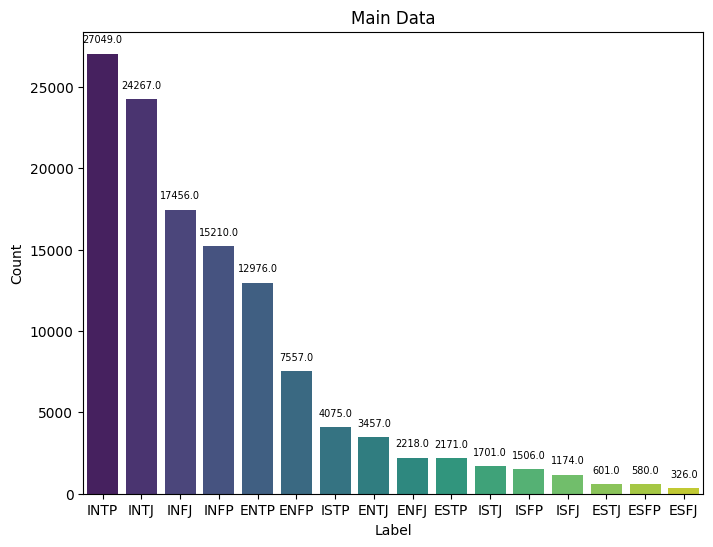

In [ ]:
#main dataframe visualization
viualization(df, "Main Data")

In [ ]:
def visualizationList(df_list, titles):
    fig, axes = plt.subplots(1, len(df_list), figsize=(16, 6))

    for i, (df, title) in enumerate(zip(df_list, titles)):
        # Count the occurrences of each unique value in the "Label" column
        label_counts = df['Label'].value_counts()

        # Plot the counts using seaborn with count labels on bars
        ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis', ax=axes[i])

        # Display count labels on the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                        textcoords='offset points')

        ax.set_title(title)
        ax.set_xlabel('Label')
        ax.set_ylabel('Count')

    plt.tight_layout()
    plt.show()

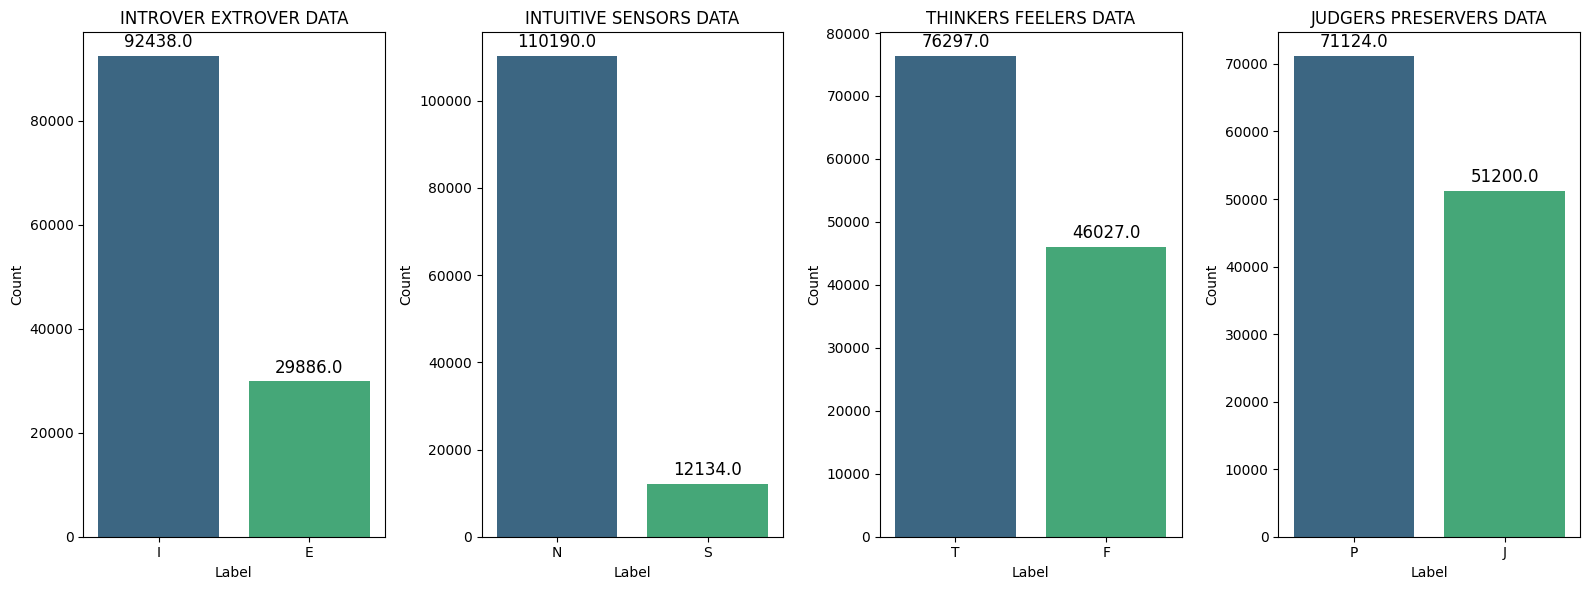

In [ ]:
#INTROVER EXTROVER DATA visualization
visualizationList([ie_df,ns_df,tf_df,jp_df], ["INTROVER EXTROVER DATA","INTUITIVE SENSORS DATA","THINKERS FEELERS DATA","JUDGERS PRESERVERS DATA"])

#Encoding Labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def encode_label(df):
  # Create a LabelEncoder for the 'Label' column
  label_encoder = LabelEncoder()

  # Fit and transform the 'Label' column
  df['Label'] = label_encoder.fit_transform(df['Label'])

  # Display the mapping of original labels to encoded values
  label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
  print("Label Mapping:", label_mapping)

  # Display the DataFrame with the encoded labels
  print(df[['Label']])
  return df

In [ ]:
df = encode_label(df)
ie_df = encode_label(ie_df)
ns_df = encode_label(ns_df)
tf_df = encode_label(tf_df)
jp_df = encode_label(jp_df)
qualized_ie_df = encode_label(qualized_ie_df)
qualized_ns_df = encode_label(qualized_ns_df)
qualized_tf_df = encode_label(qualized_tf_df)
qualized_jp_df = encode_label(qualized_jp_df)

<ipython-input-31-025995687ce8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = label_encoder.fit_transform(df['Label'])


Label Mapping: {'ENFJ': 0, 'ENFP': 1, 'ENTJ': 2, 'ENTP': 3, 'ESFJ': 4, 'ESFP': 5, 'ESTJ': 6, 'ESTP': 7, 'INFJ': 8, 'INFP': 9, 'INTJ': 10, 'INTP': 11, 'ISFJ': 12, 'ISFP': 13, 'ISTJ': 14, 'ISTP': 15}
        Label
0          10
1          10
2          10
3          10
4          10
...       ...
106062      9
106063      9
106064      9
106065      9
106066      9

[122324 rows x 1 columns]
Label Mapping: {'E': 0, 'I': 1}
        Label
0           1
1           1
2           1
3           1
4           1
...       ...
106062      1
106063      1
106064      1
106065      1
106066      1

[122324 rows x 1 columns]
Label Mapping: {'N': 0, 'S': 1}
        Label
0           0
1           0
2           0
3           0
4           0
...       ...
106062      0
106063      0
106064      0
106065      0
106066      0

[122324 rows x 1 columns]
Label Mapping: {'F': 0, 'T': 1}
        Label
0           1
1           1
2           1
3           1
4           1
...       ...
106062      0
106063   

#-----------------------------------------------------------

smote

In [ ]:
import numpy as np
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, LSTM, Embedding
from sklearn.metrics import classification_report
from transformers import BertTokenizer, TFBertModel

In [ ]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df["Post"], df["Label"], test_size=0.2, random_state=42
)

In [ ]:
# Tokenize the text data
max_words = 2000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data)

In [ ]:
# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

In [ ]:
# Pad sequences to make them of equal length
max_len = max(len(seq) for seq in train_sequences)
train_data_padded = pad_sequences(train_sequences, maxlen=max_len)
test_data_padded = pad_sequences(test_sequences, maxlen=max_len)

In [ ]:
# # Apply SMOTE only to the training data
# smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
# X_resampled, y_resampled = smote.fit_resample(train_sequences, train_labels)

# # Concatenate original data with resampled data
# train_data_padded = np.vstack((train_data_padded, X_resampled))
# test_data_padded = np.concatenate((test_data_padded, y_resampled))

In [ ]:
# Define the LSTM model
embedding_dim = 16
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(64))  # You can adjust the number of LSTM units based on your task
model.add(Dense(16, activation='softmax'))  # Assuming 16 classes, softmax for multi-class classification

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define the class weights based on the counts
class_counts = {0: 2218, 1: 7557, 2: 3457, 3: 12976, 4: 326, 5: 580,
                6: 601, 7: 2171, 8: 17456, 9: 15210, 10: 24267, 11: 27049,
                12: 1174, 13: 1506, 14: 1701, 15: 4075}

total_samples = sum(class_counts.values())
class_weights = {label: total_samples / (len(class_counts) * count) for label, count in class_counts.items()}

# Train the model
model.fit(train_data_padded, train_labels, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weights)

model.save('mbti_smote.h5')

In [ ]:

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data_padded, test_labels)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

#NLP MODELS

In [ ]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Save the model to a directory
model_save_dir = './'
tokenizer.save_pretrained(model_save_dir)
bert_model.save_pretrained(model_save_dir)

In [ ]:
# Load the saved model from the directory
model_save_dir = './'
tokenizer = BertTokenizer.from_pretrained(model_save_dir)
bert_model = TFBertModel.from_pretrained(model_save_dir)

In [ ]:
# Function to obtain BERT embeddings
def bert_embedding(text):
    inputs = tokenizer(text, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(inputs)
    embeddings = outputs.last_hidden_state[:, 0, :]
    return embeddings.numpy()

In [ ]:
# # Obtain BERT embeddings
# X = np.concatenate(df['Post'].apply(bert_embedding).to_numpy(), axis=0)

In [ ]:
# y = tf.keras.utils.to_categorical(df['Label'], num_classes=16)

In [ ]:
# # LSTM model for multiclass classification
# model = Sequential()
# model.add(LSTM(64, input_shape=(X.shape[1],)))
# model.add(Dense(16, activation='softmax'))  # Multiclass classification with softmax
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
## Train the model
# model.fit(X, y, epochs=10, batch_size=32)

#CBOW MODEL

In [ ]:
# Obtain BERT embeddings
qualized_ns_df_vectors
qualized_ns_df_vectors = np.concatenate(qualized_ns_df['Post'].apply(bert_embedding).to_numpy(), axis=0)

In [ ]:
word2vec_model_path = "GoogleNews-vectors-negative300.bin"
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)

In [ ]:
def get_word2vec_embeddings(text):
    embeddings = [word2vec_model[word] if word in word2vec_model else np.zeros(300) for word in text.split()]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(300)

In [ ]:
# X_all_word2vec = [get_word2vec_embeddings(text) for text in df['Post']]

In [ ]:
# word2vec_model = None
# ie_df = None
# ns_df = None
# tf_df = None
# jp_df = None

In [ ]:
##PREVIOUS ARCH
# nn_model = Sequential()
# nn_model.add(LSTM(512, activation='relu', input_shape=(300, 1)))
# nn_model.add(Dropout(0.5))

# nn_model.add(Dense(256, activation='relu'))
# nn_model.add(Dense(128, activation='relu'))

# nn_model.add(Dense(16, activation='softmax'))

In [ ]:
# nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# nn_model.fit(X_combined, y_combined, epochs=10, batch_size=128, validation_split=0.2)
# nn_model.save('mbti_smote.h5')

In [ ]:
# # Evaluate the model on the test set
# y_pred = nn_model.predict(X_test_word2vec)
# y_pred = (y_pred > 0.5).astype(int)

# # Decode predictions and labels
# decoded_preds = label_encoder.inverse_transform(y_pred.flatten())
# decoded_labels = label_encoder.inverse_transform(test_labels)

# # Print classification report
# print(classification_report(decoded_labels, decoded_preds))

In [ ]:
# X_train

array([[ 0.04039957, -0.00022527,  0.01973862, ..., -0.03858663,
         0.01449781, -0.01293328],
       [ 0.0346173 , -0.00696668, -0.00386859, ..., -0.04192355,
         0.035454  , -0.0318125 ],
       [ 0.04994078,  0.01359411,  0.00060217, ..., -0.04809318,
         0.03971819, -0.02037629],
       ...,
       [ 0.03290887,  0.0219488 ,  0.00739247, ..., -0.0441672 ,
         0.007058  ,  0.00928761],
       [ 0.03191809,  0.01097343,  0.00743373, ..., -0.05217724,
         0.02473369, -0.00708355],
       [ 0.03133339,  0.03460039,  0.00960905, ..., -0.05532065,
         0.01198792, -0.00890098]])

In [ ]:
# y_train

53074    S
51431    S
52745    S
76791    S
77109    S
        ..
59415    N
65736    N
48308    S
14455    N
78587    S
Name: Label, Length: 15315, dtype: object

In [ ]:
# label_encoder = LabelEncoder()

In [ ]:
# y_train = label_encoder.fit_transform(y_train)

In [ ]:
# y_train

array([10,  0,  8, ...,  8,  9, 10])

In [ ]:
# nn_model = Sequential()
# nn_model.add(Dense(512, activation='relu'))
# nn_model.add(Dropout(0.5))  # Adding dropout for regularization
# nn_model.add(Dense(256, activation='relu'))
# nn_model.add(Dropout(0.5))
# nn_model.add(Dense(128, activation='relu'))
# nn_model.add(Dropout(0.5))
# nn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# nn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# nn_model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_split=0.2)
# nn_model.save('mbti_smote.h5')

In [ ]:
# # Evaluate the model on the test set
# y_pred = nn_model.predict(X_test_word2vec)
# y_pred = (y_pred > 0.5).astype(int)

# # Decode predictions and labels
# decoded_preds = label_encoder.inverse_transform(y_pred.flatten())
# decoded_labels = label_encoder.inverse_transform(test_labels)

# # Print classification report
# print(classification_report(decoded_labels, decoded_preds))

mbti_class_weight

In [ ]:
# class_weights = {0: 1.0, 1: 5.0}  # Adjust the weights based on your specific class distribution

# # Define and train Neural Network model with class weighting
# nn_class_model = Sequential()
# nn_class_model.add(Dense(256, activation='relu', input_dim=300))  # Assuming Word2Vec embeddings are 300-dimensional
# nn_class_model.add(Dropout(0.5))
# nn_class_model.add(Dense(128, activation='relu'))
# nn_class_model.add(Dropout(0.5))
# nn_class_model.add(Dense(1, activation='sigmoid'))

# nn_class_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# nn_class_model.fit(X_train_word2vec, train_labels, epochs=5, batch_size=32, validation_split=0.2, class_weight=class_weights)

# # Save the trained model with class weighting
# nn_class_model.save('mbti_class_weight.h5')

NameError: name 'X_train_word2vec' is not defined

In [ ]:
# y_pred = nn_class_model.predict(X_test_word2vec)
# y_pred = (y_pred > 0.5).astype(int)

# # Decode predictions and labels
# decoded_preds = label_encoder.inverse_transform(y_pred.flatten())
# decoded_labels = label_encoder.inverse_transform(test_labels)

# # Print classification report
# print(classification_report(decoded_labels, decoded_preds))

##Classical Approuch

###Logistic Regression

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.2 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
qualized_ie_df_vectors_CBOW = [get_word2vec_embeddings(text) for text in qualized_ie_df['Post']]
qualized_ns_df_vectors_CBOW = [get_word2vec_embeddings(text) for text in qualized_ns_df['Post']]
qualized_tf_df_vectors_CBOW = [get_word2vec_embeddings(text) for text in qualized_tf_df['Post']]
qualized_jp_df_vectors_CBOW = [get_word2vec_embeddings(text) for text in qualized_jp_df['Post']]

In [ ]:
word2vec_model = None
ie_df = None
ns_df = None
tf_df = None
jp_df = None

In [ ]:
# define bert vectors

In [ ]:
#main function
def preformClassicalPredictions(df, X):
    # Apply the embedding function to each text in the DataFrame
    y = df['Label']

    # Remove None values from X and corresponding labels from y
    X = [x for x in X if x is not None]
    y = y.iloc[:len(X)]

    # Convert X to a numpy array
    X = np.array(X)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Train Logistic Regression classifier
    logistic_regression = LogisticRegression(random_state=42)
    logistic_regression.fit(X_train, y_train)
    y_pred_lr = logistic_regression.predict(X_test)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    print(f"Logistic Regression Accuracy: {accuracy_lr:.5%}")

    # Train Linear Support Vector Classification (SVC) classifier
    svc = SVC(random_state=42)
    svc.fit(X_train, y_train)
    y_pred_svc = svc.predict(X_test)
    accuracy_svc = accuracy_score(y_test, y_pred_svc)
    print(f"SVC Accuracy: {accuracy_svc:.5%}")

    # Train Stochastic Gradient Descent (SGD) classifier
    sgd = SGDClassifier(random_state=42)
    sgd.fit(X_train, y_train)
    y_pred_sgd = sgd.predict(X_test)
    accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
    print(f"SGD Classifier Accuracy: {accuracy_sgd:.5%}")

    # Train Random Forest classifier
    random_forest = RandomForestClassifier(random_state=42)
    random_forest.fit(X_train, y_train)
    y_pred_rf = random_forest.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest Accuracy: {accuracy_rf:.5%}")

    # Train Extreme Gradient Boosting (XGBoost) classifier
    xgboost = XGBClassifier(random_state=42)
    xgboost.fit(X_train, y_train)
    y_pred_xgb = xgboost.predict(X_test)
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    print(f"XGBoost Accuracy: {accuracy_xgb:.5%}")

    # Train CatBoost classifier
    catboost = CatBoostClassifier(random_state=42, verbose=0)
    catboost.fit(X_train, y_train)
    y_pred_cat = catboost.predict(X_test)
    accuracy_cat = accuracy_score(y_test, y_pred_cat)
    print(f"CatBoost Accuracy: {accuracy_cat:.5%}")

In [ ]:
preformClassicalPredictions(qualized_ie_df, qualized_ie_df_vectors_CBOW)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 72.00236%
SVC Accuracy: 73.42630%
SGD Classifier Accuracy: 69.10537%
Random Forest Accuracy: 68.19208%
XGBoost Accuracy: 71.04979%
CatBoost Accuracy: 72.97457%


In [ ]:
preformClassicalPredictions(qualized_ns_df, qualized_ns_df_vectors_CBOW)

Logistic Regression Accuracy: 75.70045%
SVC Accuracy: 78.34512%
SGD Classifier Accuracy: 76.40744%
Random Forest Accuracy: 73.47473%
XGBoost Accuracy: 76.72165%
CatBoost Accuracy: 78.60697%


In [ ]:
preformClassicalPredictions(qualized_tf_df, qualized_tf_df_vectors_CBOW)

Logistic Regression Accuracy: 83.15940%
SVC Accuracy: 84.24474%
SGD Classifier Accuracy: 81.99058%
Random Forest Accuracy: 80.07633%
XGBoost Accuracy: 81.92498%
CatBoost Accuracy: 83.70803%


In [ ]:
preformClassicalPredictions(qualized_jp_df, qualized_jp_df_vectors_CBOW)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 67.57958%
SVC Accuracy: 69.20444%
SGD Classifier Accuracy: 66.00582%
Random Forest Accuracy: 65.83721%
XGBoost Accuracy: 66.96132%
CatBoost Accuracy: 68.82122%
